In [1]:
!pip install fastai2 -q

     |████████████████████████████████| 184kB 8.8MB/s 


In [0]:
from fastai2.vision.all import *
from fastai2.basics import*
from fastai2.callback.all import*

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
matplotlib.rc('image')

In [4]:
path=Path('drive/My Drive/tennis')
path.ls()

(#4) [Path('drive/My Drive/tennis/forehand'),Path('drive/My Drive/tennis/backhand'),Path('drive/My Drive/tennis/serve'),Path('drive/My Drive/tennis/smash')]

In [0]:
images=get_image_files(path)

In [0]:
im=PILImage.create(images[0])

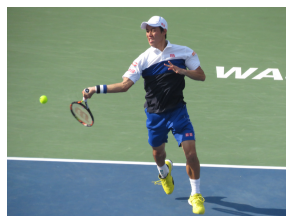

In [7]:
im.show()

In [0]:
split=RandomSplitter(0.1, seed=2)

In [0]:
splits=split(images)

In [10]:
splits

((#357) [287,380,203,394,121,191,382,147,102,248...],
 (#39) [36,183,23,261,386,110,348,229,312,231...])

In [0]:
help(DataBlock)

In [0]:
item_tfms=RandomResizedCrop(224, 0.9)
#atch_tfms=[*aug_transforms(max_rotate=8)]

In [0]:
 data=DataBlock(blocks=(ImageBlock, CategoryBlock),
                get_items=get_image_files,
                splitter=split,
                get_y=parent_label,
                item_tfms=item_tfms
                #batch_tfms=batch_tfms
                )

In [0]:
dls=data.dataloaders(path, bs=86)

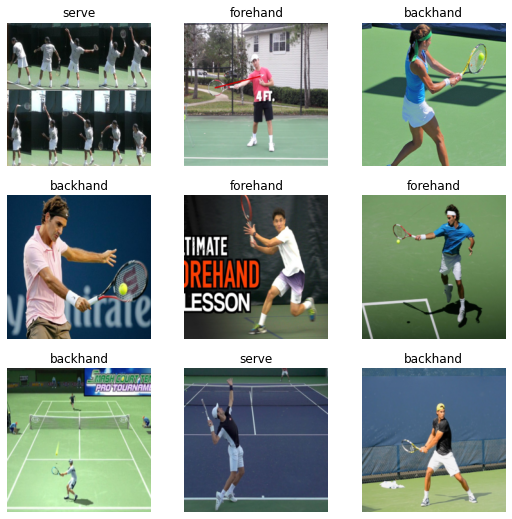

In [43]:
dls.show_batch()

In [0]:
learn=cnn_learner(dls, resnet50, loss_func=CrossEntropyLossFlat(), metrics=accuracy, wd=0.01).to_fp16()

In [0]:
#learn.summary()

SuggestedLRs(lr_min=0.006918309628963471, lr_steep=0.0006918309954926372)

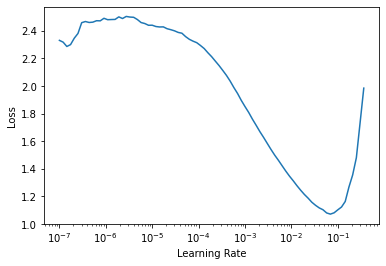

In [46]:
learn.lr_find()

In [0]:
learn.freeze()

In [48]:
learn.fit_one_cycle(3,lr_max=0.005)

epoch,train_loss,valid_loss,accuracy,time
0,2.075908,3.032224,0.487179,00:08
1,1.423284,3.212007,0.589744,00:08
2,1.013454,2.427003,0.589744,00:09


In [51]:
del learn

NameError: ignored

In [50]:
learn.save('stage1');

NameError: ignored

In [0]:
learn.lr_find()

In [0]:
learn.load('stage1');

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

In [0]:
learn.fit_one_cycle(5,lr_max=0.0004)

In [0]:
learn.show_results()

In [53]:
learn.fine_tune(6,freeze_epochs=1)

epoch,train_loss,valid_loss,accuracy,time
0,2.588858,3.177156,0.256410,00:09


epoch,train_loss,valid_loss,accuracy,time
0,2.595942,1.964092,0.333333,00:09
1,2.095138,1.307171,0.487179,00:09
2,1.474072,1.473884,0.589744,00:09
3,1.104794,1.549396,0.666667,00:09
4,0.867245,1.566913,0.641026,00:09
5,0.705899,1.580571,0.666667,00:09


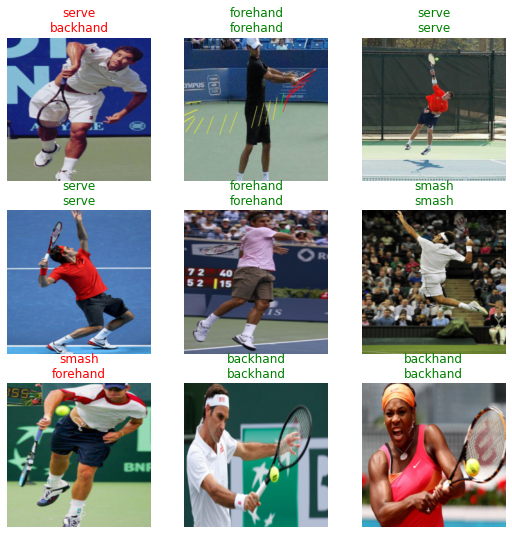

In [54]:
learn.show_results()

In [55]:
interpret=ClassificationInterpretation.from_learner(learn)

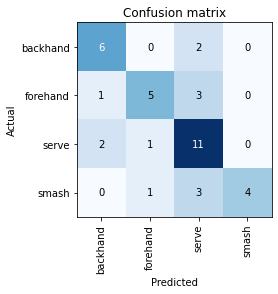

In [56]:
interpret.plot_confusion_matrix()

In [57]:
interpret.most_confused()

[('forehand', 'serve', 3),
 ('smash', 'serve', 3),
 ('backhand', 'serve', 2),
 ('serve', 'backhand', 2),
 ('forehand', 'backhand', 1),
 ('serve', 'forehand', 1),
 ('smash', 'forehand', 1)]